In [1]:
# Import necessary libraries
from tensorflow.keras.models import load_model

# Provide the path where your .keras model is saved
model_path = 'PDIUDLv2.keras'

# Load the model 
model = load_model(model_path)

# Print the model summary to verify it's loaded correctly
model.summary()



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 254, 254, 256)         │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 127, 127, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 125, 125, 64)          │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (32, 12544)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (32, 64)                    │         802,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (32, 64)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (32, 64)                    │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (32, 64)                    │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (32, 64)                    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,119,819 (11.90 MB)

 Trainable params: 1,039,939 (3.97 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,079,880 (7.93 MB)

In [6]:
BatchSize=32
ImageSize=256
Channel=3
Epochs=30

In [4]:
import tensorflow as tf

# Update the path to your dataset
directory = 'Test_data'

# Create a dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    image_size=(ImageSize, ImageSize), 


Found 450 files belonging to 3 classes.


In [5]:
class_names=dataset.class_names

In [4]:
class_names

NameError: name 'class_names' is not defined

In [7]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split+val_split+test_split)==1

    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size, seed=12)

    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)

    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [8]:
train_ds, val_ds, test_ds=get_dataset_partitions_tf(dataset)

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

def predict(model, img):
    img_arry = tf.expand_dims(img, 0)  # create a batch
    predictions = model.predict(img_arry)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = 100 * np.max(predictions[0])
    return predicted_class, confidence

# Assuming images, class_name, labels, and model are already defined
def display_predictions(images, labels, class_names, model):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence:.2f}%")
        plt.axis("off")
    plt.show()

# Example usage:
# display_predictions(images, labels, class_name, model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


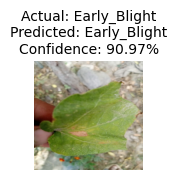

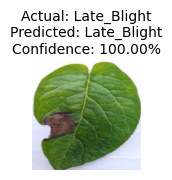

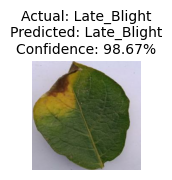

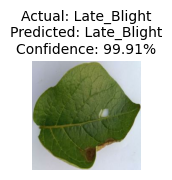

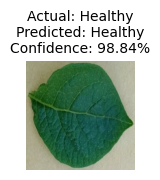

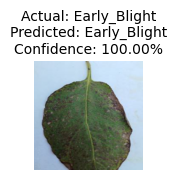

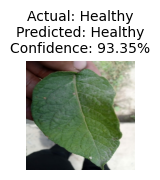

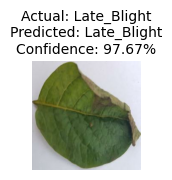

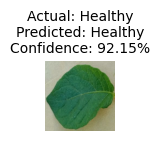

In [12]:
for images, label in test_ds.take(1):
    for i in range(9):
        plt.figure()
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[label[i]]
        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence:.2f}%", fontsize=10)
        plt.axis("off")

plt.tight_layout(pad=3.0)  # Adjust spacing between subplots
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


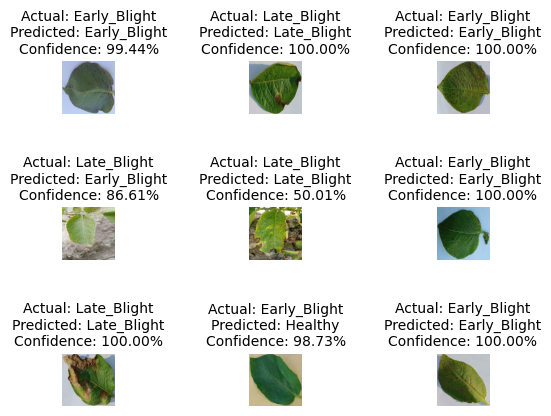

In [13]:
for images, label in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[label[i]]
        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}\nConfidence: {confidence:.2f}%", fontsize=10)
        plt.axis("off")

plt.tight_layout(pad=3.0)  # Adjust spacing between subplots
plt.show()


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# Initialize lists to hold true labels and predictions
y_true = []
y_pred = []

# Iterate over the test dataset to get predictions and true labels
for images, labels in test_ds:  
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))
    y_true.extend(labels.numpy())

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)



1/1 ━━━━━━━━━━━━━━━━━━━━ 1752s 1752s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 648s 648s/step


In [ ]:

# Calculate the classification report
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)

# Extract precision, recall, and F1-score for each class
precision = [report[cls]['precision'] * 100 for cls in class_names]
recall = [report[cls]['recall'] * 100 for cls in class_names]
f1_score = [report[cls]['f1-score'] * 100 for cls in class_names]


In [ ]:
# Create a bar plot for each metric
x = np.arange(len(class_names))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores (%)')
ax.set_title('Precision, Recall, and F1-Score by Class')
ax.set_xticks(x)
ax.set_xticklabels(class_names)
ax.legend()

# Add a text label above each bar in rects
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.1f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()


In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image

In [10]:
image_path = 'potato/Healthy/Healthy (4).jpg'
image = tf.keras.preprocessing.image.load_img(image_path)

In [11]:
image_array = tf.keras.preprocessing.image.img_to_array(image).astype("uint8")

AttributeError: img_to_array

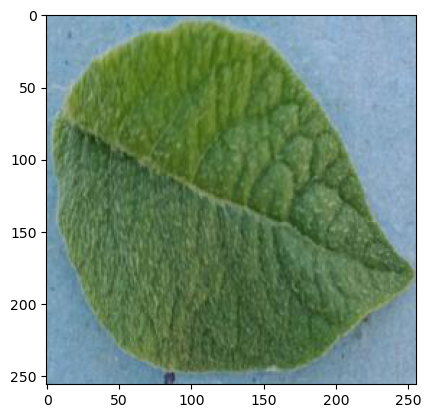

In [13]:
plt.imshow(image_array)
target_size=(256,256)
img =tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
img_array=image.img_to_array(img)
img_array= np.expand_dims(img_array, axis=0)
img_array/=255.0

prediction = model.predict(img)
print("Predeicted Label",prediction)

In [ ]:
# Import necessary libraries

from tkinter import filedialog
from PIL import Image

# Function to load and preprocess the image
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image
    return img_array

# Function to display the image
def display_image(img_path):
    img = Image.open(img_path)
    plt.imshow(img)
    plt.axis('off')  # Turn off the axis
    plt.show()

# Select the image file
img_path = filedialog.askopenfilename()

# Display the image
print("Input Image:")
display_image(img_path)

# Preprocess the image
img_array = load_and_preprocess_image(img_path)

# Predict the class
predictions = model.predict(img_array)

# Display the predictions
print("Predicted Class Probabilities:", predictions)



In [3]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.2 MB/s eta 0:00:00


In [5]:
import gradio as gr
import tensorflow as tf
import numpy as np
from PIL import Image

# Define the labels for your disease classes
labels = ['Early_Blight', 'Healthy', 'Late_Blight']

def predict_disease(image):
    # Convert the uploaded image to RGB and resize it to the input size expected by the model
    image = Image.fromarray(image)
    image = image.convert('RGB')
    image = image.resize((256, 256))
    image = np.array(image)

    # Normalize the image
    image = image / 255.0
    image = np.expand_dims(image, axis=0)  # Add batch dimension

    # Predict the disease
    predictions = model.predict(image)
    predicted_class = labels[np.argmax(predictions)]
    confidence_scores = {label: float(predictions[0][i]) for i, label in enumerate(labels)}

    return predicted_class, confidence_scores



# def predict(img):
#     img_arry = tf.expand_dims(img, 0)  # create a batch
#     predictions = model.predict(img_arry)
#     predicted_class = class_names[np.argmax(predictions[0])]
#     confidence_scores = 100 * np.max(predictions[0])
#     return predicted_class, confidence_scores

# Create a Gradio interface
iface = gr.Interface(
    fn=predict_disease,
    inputs=gr.Image(),
    outputs=[gr.Textbox(label="Predicted Class"), gr.Label(label="Confidence Scores")],
    title="Potato Disease Identification (by: Pervez Abbas)"
)

# Launch the interface
iface.launch()


Running on local URL:  http://127.0.0.1:7863

To create a public link, set `share=True` in `launch()`.


8/8 ━━━━━━━━━━━━━━━━━━━━ 143s 17s/step


Traceback (most recent call last):
  File "C:\Users\PERVEZ ABBAS\anaconda3\lib\site-packages\gradio\queueing.py", line 536, in process_events
    response = await route_utils.call_process_api(
  File "C:\Users\PERVEZ ABBAS\anaconda3\lib\site-packages\gradio\route_utils.py", line 276, in call_process_api
    output = await app.get_blocks().process_api(
  File "C:\Users\PERVEZ ABBAS\anaconda3\lib\site-packages\gradio\blocks.py", line 1923, in process_api
    result = await self.call_function(
  File "C:\Users\PERVEZ ABBAS\anaconda3\lib\site-packages\gradio\blocks.py", line 1508, in call_function
    prediction = await anyio.to_thread.run_sync(  # type: ignore
  File "C:\Users\PERVEZ ABBAS\anaconda3\lib\site-packages\anyio\to_thread.py", line 28, in run_sync
    return await get_asynclib().run_sync_in_worker_thread(func, *args, cancellable=cancellable,
  File "C:\Users\PERVEZ ABBAS\anaconda3\lib\site-packages\anyio\_backends\_asyncio.py", line 818, in run_sync_in_worker_thread
    return 